In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("churn_train.csv")

In [3]:
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [5]:
df.describe()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
df["last_trip_date"] = pd.to_datetime(df['last_trip_date'])

In [7]:
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [8]:
df["signup_date"]=pd.to_datetime(df["signup_date"])
today=df.last_trip_date.max()
df["Churn"]= df["last_trip_date"].apply(lambda x : 1 if today-x> timedelta(days=30) else 0)

In [9]:
df["Membership_period"] = today - timedelta(days=30) - df["signup_date"]
df["Membership_period"]=df["Membership_period"].astype("timedelta64[D]").astype(int)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churn,Membership_period
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,140
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,127
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1,150
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1,143
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1,121


In [10]:
test=df.groupby(['Churn'])['trips_in_first_30_days'].max()
print test



Churn
0    125
1     73
Name: trips_in_first_30_days, dtype: int64


In [11]:
df["Membership_period"] = today - timedelta(days=30) - df["signup_date"]

In [19]:
df["Membership_period"]=df["Membership_period"].astype("timedelta64[D]").astype(int)
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(0)
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(0)
df2=df.loc[df["avg_rating_of_driver"]==0]




In [13]:
df['phone']=df['phone'].apply(lambda x: 1 if x=='iPhone' else 0)
df.head()

num = df.groupby(['Churn']).count()
print num
average = df.groupby(['Churn'])["avg_rating_of_driver"].mean()
print average
df.head()


       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge   city  \
Churn                                                                           
0         15032                 15032                 15032      15032  15032   
1         24968                 24968                 24968      24968  24968   

       last_trip_date  phone  signup_date  surge_pct  trips_in_first_30_days  \
Churn                                                                          
0               15032  15032        15032      15032                   15032   
1               24968  24968        24968      24968                   24968   

       luxury_car_user  weekday_pct  Membership_period  
Churn                                                   
0                15032        15032              15032  
1                24968        24968              24968  
Churn
0    4.185557
1    3.649099
Name: avg_rating_of_driver, dtype: float64


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churn,Membership_period
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,0,2014-01-12,0.0,0,False,100.0,1,140
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,0,2014-01-25,0.0,2,True,0.0,1,127
2,21.50,4.0,0.0,1.00,Winterfell,2014-05-21,1,2014-01-02,0.0,1,True,100.0,1,150
3,9.46,5.0,0.0,2.75,Winterfell,2014-01-10,0,2014-01-09,100.0,1,False,100.0,1,143
4,13.77,5.0,0.0,1.00,Winterfell,2014-05-13,1,2014-01-31,0.0,0,False,100.0,1,121


In [14]:
x = df[["avg_dist", "avg_surge", "weekday_pct", "trips_in_first_30_days", "Membership_period", "phone", "luxury_car_user"]]
y = df["Churn"]
#x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8)
logr = LogisticRegression()
logr.fit(x, y)
logr.predict(x)
df_test = pd.read_csv("churn_test.csv")
df_test["signup_date"]=pd.to_datetime(df_test["signup_date"])
df_test["last_trip_date"] = pd.to_datetime(df_test['last_trip_date'])
today_test=df_test.last_trip_date.max()
df_test["Churn"]= df_test["last_trip_date"].apply(lambda x : 1 if today_test-x> timedelta(days=30) else 0)
df_test["Membership_period"] = today_test - timedelta(days=30) - df_test["signup_date"]
df_test["Membership_period"]=df_test["Membership_period"].astype("timedelta64[D]").astype(int)

df_test['phone']=df_test['phone'].apply(lambda x: 1 if x=='iPhone' else 0)
x_test = df_test[["avg_dist", "avg_surge", "weekday_pct", "trips_in_first_30_days", "Membership_period", "phone","luxury_car_user"]]
y_test = df_test["Churn"]



In [15]:
logr.score(x_test,y_test)

0.67849999999999999

In [38]:
coefficients = np.transpose(logr.coef_)
print coefficients

[[  3.10938524e-02]
 [ -2.28475492e-02]
 [  9.56540330e-06]
 [ -1.20962871e-01]
 [ -3.80485661e-03]
 [ -1.07979839e+00]
 [ -8.13060324e-01]]


In [31]:
df2.groupby("city").count()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churn,Membership_period
city,,,,,,,,,,,,,
Astapor,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305
King's Landing,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
Winterfell,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182


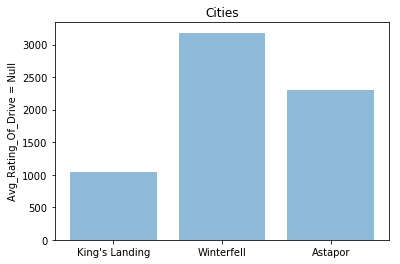

In [26]:
objects = ("King's Landing", "Winterfell", "Astapor")
y_pos = np.arange(len(objects))
performance = [1041, 3182, 2305]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Avg_Rating_Of_Drive = Null')
plt.title('Cities')

plt.show()